# Import libraries

In [0]:
# !pip install talos
import cv2
import os
from google.colab.patches import cv2_imshow
import zipfile
import keras
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
import matplotlib.image as mpig
import matplotlib.pyplot as plt
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import seaborn as sns
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix



Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Extract the zip files

In [0]:
i=1
j=1
for k in range(1,11): #11
  path = '/content/drive/My Drive/MWI-Dataset-1.'+str(j)+'.'+str(i)+'.zip'
  with zipfile.ZipFile(path, 'r') as zip_ref:
      zip_ref.extractall('/content/drive/My Drive/DatasetHW2')
  i+=1
  if k == 5 : 
    j=2
    i=1
  print(path," extracted")

/content/drive/My Drive/MWI-Dataset-1.1.1.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.1.2.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.1.3.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.1.4.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.1.5.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.2.1.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.2.2.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.2.3.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.2.4.zip  extracted
/content/drive/My Drive/MWI-Dataset-1.2.5.zip  extracted


In [0]:
import tarfile

path = '/content/drive/My Drive/TestSet_Weather.tar.gz'
with tarfile.open(path) as tar:
  tar.extractall(path='/content/drive/My Drive/DatasetHW2/Test')
  print(path," extracted")

/content/drive/My Drive/TestSet_Weather.tar.gz  extracted


# **PREPROCESSING**

# Store into a  variable all resized images

Build *X_path* to store all paths 

In [0]:
DB_path = '/content/drive/My Drive/DatasetHW2/Test/Weather_Dataset'
ClassArray=['/HAZE','/RAINY','/SNOWY','/SUNNY']

X_path = []
Y_all = []
num_classes = len(ClassArray)
for i in range(len(ClassArray)):
  for j in os.listdir(DB_path+ClassArray[i]):
    Xtrain = DB_path+ClassArray[i]+'/{}'.format(j)
    X_path.append(Xtrain)
    Y_all.append([i])
# X_path = np.array(X_path).flatten()
#X_path contains all images paths
#Y_all contains all labels
print('done ',len(X_path), ' images')

done  3037  images


In [0]:
DB_path = '/content/drive/My Drive/DatasetHW2/MWI-Dataset'
# X_path = []
# Y_all = []
for i in range(len(ClassArray)):
  for j in os.listdir(DB_path+ClassArray[i]):
    Xtrain = DB_path+ClassArray[i]+'/{}'.format(j)
    X_path.append(Xtrain)
    Y_all.append([i])
X_path = np.array(X_path).flatten()
#X_path contains all images paths
#Y_all contains all labels
print('done ',len(X_path), ' images')

done  7037  images


Build *X_all* to store all images

In [0]:
img_resized_res = 150 #setting the resolution to (img_resized_res x img_resized_res)
X_all = []
j = 0
val_old = round(j/len(X_path)*100,1)

print("preprocessing.. ", val_old, " %")
for imges in X_path:
  j+=1
  val = round(j/len(X_path)*100,1)
  if (val % 1 == 0 and val != val_old): print("progress.. ", round(j/len(X_path)*100,1), "%")
  val_old = val

  # print(imges) #verbose
  imges = cv2.imread(imges, cv2.IMREAD_UNCHANGED)
  if len(imges[0][0]) > 3: imges = cv2.cvtColor(imges, cv2.COLOR_BGRA2BGR) #normalizing to 3 channel
  X_all.append(cv2.resize(imges, (img_resized_res,img_resized_res), interpolation = cv2.INTER_AREA))
print("done ",len(X_all)," images")
#X_all contains all images

preprocessing..  0.0  %
progress..  1.0 %
progress..  2.0 %
progress..  3.0 %
progress..  4.0 %
progress..  5.0 %
progress..  6.0 %
progress..  7.0 %
progress..  8.0 %
progress..  9.0 %
progress..  10.0 %
progress..  11.0 %
progress..  12.0 %
progress..  13.0 %
progress..  14.0 %
progress..  15.0 %
progress..  16.0 %
progress..  17.0 %
progress..  18.0 %
progress..  19.0 %
progress..  20.0 %
progress..  21.0 %
progress..  22.0 %
progress..  23.0 %
progress..  24.0 %
progress..  25.0 %
progress..  26.0 %
progress..  27.0 %
progress..  28.0 %
progress..  29.0 %
progress..  30.0 %
progress..  31.0 %
progress..  32.0 %
progress..  33.0 %
progress..  34.0 %
progress..  35.0 %
progress..  36.0 %
progress..  37.0 %
progress..  38.0 %
progress..  39.0 %
progress..  40.0 %
progress..  41.0 %
progress..  42.0 %
progress..  43.0 %
progress..  44.0 %
progress..  45.0 %
progress..  46.0 %
progress..  47.0 %
progress..  48.0 %
progress..  49.0 %
progress..  50.0 %
progress..  51.0 %
progress..  52.0

**Print a random image **

image  cam1-04146.png /SNOWY n° =  960


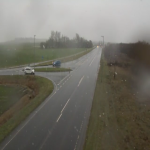

In [0]:
value = randint(0,len(X_all)-1)
name = X_path[value]
name = name.split("/")[-1]
# print(Y_all[value])
print("image ",name, ClassArray[Y_all[value][0]], "n° = ",value)
cv2_imshow(X_all[value])
cv2.waitKey(0)
cv2.destroyAllWindows()


**Encoding *Y_all* and numpify *X_all* to split**

In [0]:
X_all = np.array(X_all)
Y_all = keras.utils.to_categorical(Y_all, 4)

In [0]:
num_classes = len(ClassArray)

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, Y_all.shape)
print("input_shape = ", X_train[0].shape)
print(X_train.shape[0])
print(X_train.shape,X_all.shape)
input_shape =  (img_resized_res, img_resized_res, 3)


(4714, 150, 150, 3) (2323, 150, 150, 3) (4714, 4) (2323, 4) (7037, 4)
input_shape =  (150, 150, 3)
4714
(4714, 150, 150, 3) (7037, 150, 150, 3)


# **Build the model**

# Part I CNN from scratch: A Custom Model

In [0]:
def custom(input_shape):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape, padding = 'same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding = 'same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding = 'same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.2))  #Dropout for regularization
  model.add(Dense(512, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

  return model
 
# create the model
model = custom(input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)      

# Part II Transfer Learning: VGG16

In [0]:
from keras.applications import InceptionResNetV2
from keras.optimizers import Adam

def VGG16(input_shape):
  prior = keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=input_shape
    )
  for layer in prior.layers[:-9]:
    layer.trainable = False
    
  model = Sequential()
  model.add(prior)
  model.add(Flatten())
  model.add(Dropout(0.1, name='Dropout_Regularization'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.00001), metrics=['accuracy'])
  return model
# create the model
model = VGG16(input_shape)
model.summary()





58892288/58889256 [==============================] - 5s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
Dropout_Regularization (Drop (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 18,911,556
Trainable params: 17,176,068
Non-t

# Part II Transfer Learning: VGG19

In [0]:
from keras.applications import InceptionResNetV2

def VGG19(input_shape):
  prior = keras.applications.VGG19(
    include_top=False, 
    weights='imagenet',
    input_shape=input_shape
    )
  for layer in prior.layers[:-9]:
    layer.trainable = False

    
  model = Sequential()
  model.add(prior)
  model.add(Flatten())
  # model.add(Dropout(0.1, name='Dropout_Regularization'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  
  
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.00001), metrics=['accuracy'])
  return model
# create the model
model = VGG19(input_shape)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_16 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 2052      
Total params: 24,221,252
Trainable params: 20,715,524
Non-trainable params: 3,505,728
_________________________________________________________________


# **Fitting**

In [0]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

batch_size=32
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = val_datagen.flow(X_test,y_test,shuffle=False)

In [0]:
epochs = 64
step_p_epoch = len(X_train)/batch_size
val_step = len(X_test)/batch_size
history = model.fit_generator(train_gen, steps_per_epoch=step_p_epoch, epochs=epochs, validation_data = val_datagen, validation_steps=val_step)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/64


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


148/147 [==============================] - 56s 380ms/step - loss: 0.8968 - acc: 0.6080 - val_loss: 0.5606 - val_acc: 0.8011
Epoch 2/64
148/147 [==============================] - 47s 319ms/step - loss: 0.5416 - acc: 0.7950 - val_loss: 0.4543 - val_acc: 0.8390
Epoch 3/64
148/147 [==============================] - 47s 320ms/step - loss: 0.4440 - acc: 0.8319 - val_loss: 0.3665 - val_acc: 0.8721
Epoch 4/64
148/147 [==============================] - 47s 319ms/step - loss: 0.3972 - acc: 0.8484 - val_loss: 0.3480 - val_acc: 0.8666
Epoch 5/64
148/147 [==============================] - 47s 320ms/step - loss: 0.3504 - acc: 0.8716 - val_loss: 0.3150 - val_acc: 0.8864
Epoch 6/64
148/147 [==============================] - 47s 320ms/step - loss: 0.3063 - acc: 0.8851 - val_loss: 0.2958 - val_acc: 0.8928
Epoch 7/64
148/147 [==============================] - 47s 320ms/step - loss: 0.2700 - acc: 0.8974 - val_loss: 0.3226 - val_acc: 0.8790
Epoch 8/64
148/147 [==============================] - 47s 320ms/st

# Showing the results

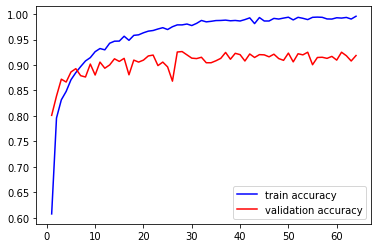

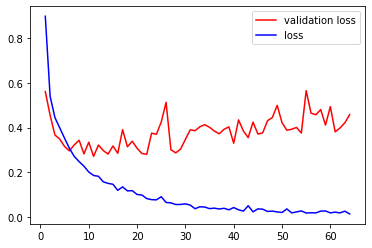

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b', label="train accuracy")
plt.plot(epochs, val_acc,'r', label="validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, val_loss,'r', label="validation loss")
plt.plot(epochs, loss,'b', label="loss")

plt.legend()

plt.show()

CM and CR

73/73 [==============================] - 11s 151ms/step
              precision    recall  f1-score   support

       /HAZE      0.968     0.826     0.892       334
      /RAINY      0.844     0.931     0.885       504
      /SNOWY      0.925     0.930     0.928       812
      /SUNNY      0.952     0.942     0.947       673

    accuracy                          0.919      2323
   macro avg      0.922     0.907     0.913      2323
weighted avg      0.921     0.919     0.919      2323



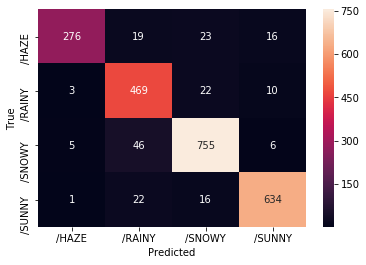

73/73 [==============================] - 11s 149ms/step
Test loss: 0.457444
Test accuracy: 0.918640


In [0]:

val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = val_datagen.flow(X_test,y_test,shuffle=False)

preds = model.predict_generator(val_datagen,verbose=1)

Ypred = np.argmax(preds, axis=1)
Ytest = np.argmax(y_test, axis=1)

print(classification_report(Ytest, Ypred, labels=None,target_names=ClassArray,  digits=3))

cm = confusion_matrix(Ytest, Ypred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d');

ax.set_xticklabels(ClassArray)
ax.set_yticklabels(ClassArray)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# loss, acc = model.evaluate_generator(val_datagen,verbose=1)
# print('Test loss: %f' %loss)
# print('Test accuracy: %f' %acc)

# Predict images

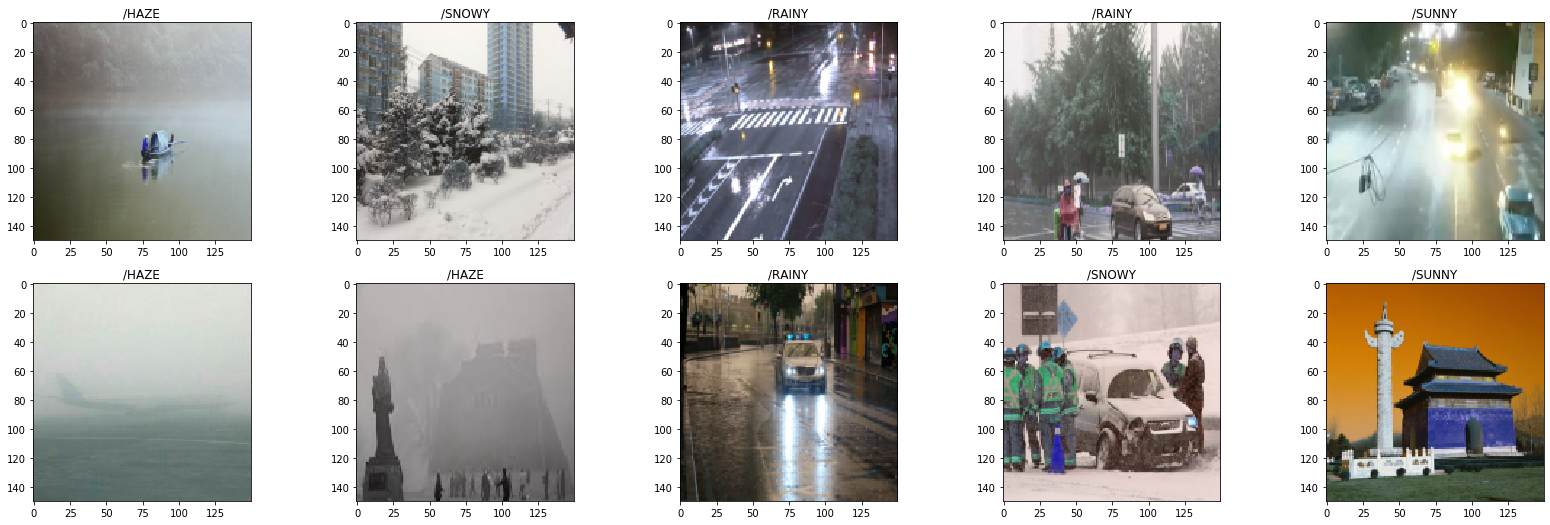

In [0]:
x = []
for f in range(10):
  x.append(X_test[randint(0,len(X_test))])
x = np.array(x)
# x = X_test[0:10]

test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
text_labels = []
plt.figure(figsize=(28,28))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    text_labels.append(pred.argmax())
    plt.subplot(6, 5, i + 1)
    plt.title(ClassArray[text_labels[i]])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

# Save Model


In [0]:
def save_model(name):
  models_saved_dir = DB_path.replace(DB_path.split("/")[-1],'') + 'Saved Models'
  print(models_saved_dir)
  model.save_weights(models_saved_dir+'/'+name+'_weights.h5')
  model.save(models_saved_dir+'/'+name+'.h5') 
  return print('saved ',name,' in ', models_saved_dir )
  
save_model("VGG16_HUGE")

/content/drive/My Drive/DatasetHW2/Saved Models
saved  VGG16_HUGE  in  /content/drive/My Drive/DatasetHW2/Saved Models


# Test blind set

In [0]:
path = '/content/drive/My Drive/WeatherBlindTestSet.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall('/content/drive/My Drive/DatasetHW2')

Create the csv

In [0]:
import pandas as pd

blind_path = '/content/drive/My Drive/DatasetHW2/WeatherBlindTestSet'
X_blind=[]
X_blind_name=[]
for j in os.listdir(blind_path):
  X_blind_name.append(j)
  imges = cv2.imread(blind_path+'/'+j, cv2.IMREAD_UNCHANGED)
  if len(imges[0][0]) > 3: imges = cv2.cvtColor(imges, cv2.COLOR_BGRA2BGR) #normalizing to 3 channel
  X_blind.append(cv2.resize(imges, (img_resized_res,img_resized_res), interpolation = cv2.INTER_AREA))
X_blind = np.array(X_blind)


In [0]:
blind_datagen = ImageDataGenerator(rescale=1./255)
label_predicted=[]
pred = model.predict_generator(blind_datagen.flow(X_blind, batch_size=1,shuffle = False))
ClassArraysoft = ['haze','rainy','snowy','sunny']
for el in pred:
  label_predicted.append(ClassArraysoft[el.argmax()])

# test to match pred and namefile


0800.jpg
snowy


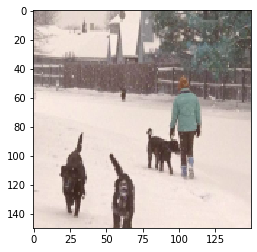

In [0]:
imgN = 22
print (X_blind_name[imgN])
print(label_predicted[imgN])
plt.figure(figsize=(28,28))
plt.subplot(6, 5, 1)

imgplot = plt.imshow(X_blind[imgN])

plt.show()


In [0]:
copy_X_blind_name = X_blind_name.copy()
copy_label_predicted = label_predicted.copy()
df = pd.DataFrame({'name file':copy_X_blind_name,'label': copy_label_predicted})
df = df.sort_values('name file')
df.to_csv("/content/drive/My Drive/sortedHW2output.csv",index=False)


# Generate the output

In [0]:
df = pd.DataFrame({'name file':X_blind_name,'label': label_predicted})
df.to_csv("/content/drive/My Drive/HW2output.csv",index=False)
print("output generated")

output generated


# Output analysis

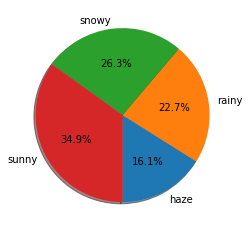

    {'haze': 241, 'rainy': 341, 'snowy': 394, 'sunny': 524}


In [0]:
unique, counts = np.unique(label_predicted, return_counts=True)
opt = dict(zip(unique, counts))

labels = ClassArraysoft
sizes = [opt["haze"],opt["rainy"],opt["snowy"],opt["sunny"]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
plt.show()
print("   ",opt)


# Another test

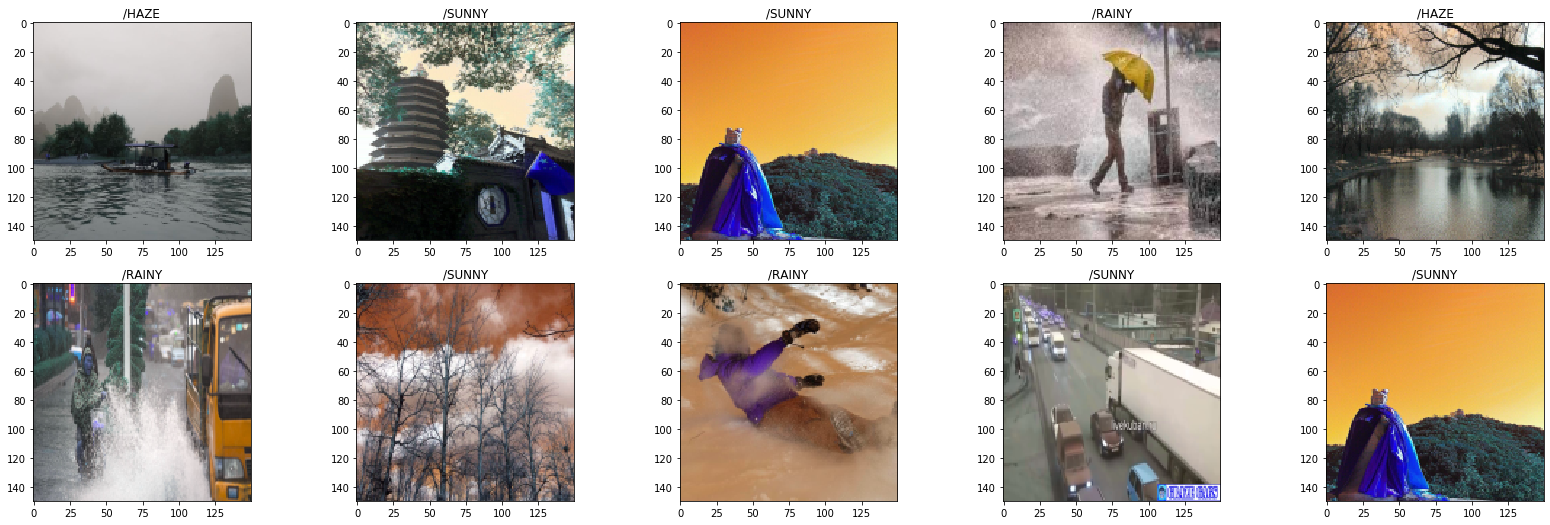

In [0]:
X_blind=[]
for i in range(1,10):
  patt='/content/drive/My Drive/DatasetHW2/WeatherBlindTestSet/000'+str(i)+'.jpg'
  imges = cv2.imread(patt, cv2.IMREAD_UNCHANGED)
  if len(imges[0][0]) > 3: imges = cv2.cvtColor(imges, cv2.COLOR_BGRA2BGR) #normalizing to 3 channel
  X_blind.append(cv2.resize(imges, (img_resized_res,img_resized_res), interpolation = cv2.INTER_AREA))
X_blind = np.array(X_blind)

test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
text_labels = []
plt.figure(figsize=(28,28))
for batch in test_datagen.flow(X_blind, batch_size=1):
    pred = model.predict(batch)
    text_labels.append(pred.argmax())
    plt.subplot(6, 5, i + 1)
    plt.title(ClassArray[text_labels[i]])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()
